# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [85]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [86]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | korla
Processing Record 2 of Set 1 | sao vicente
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | illizi
Processing Record 5 of Set 1 | nuuk
Processing Record 6 of Set 1 | port isabel
Processing Record 7 of Set 1 | kayangel
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | kalabo
Processing Record 10 of Set 1 | kangundo
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | todos santos
Processing Record 16 of Set 1 | khandyga
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | purranque
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | c

In [87]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [88]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,korla,41.7597,86.1469,268.54,68,83,1.46,CN,1706670604
1,sao vicente,-23.9631,-46.3919,302.25,26,94,1.66,BR,1706670604
2,bredasdorp,-34.5322,20.0403,291.39,97,69,1.38,ZA,1706670484
3,illizi,26.4833,8.4667,282.35,47,0,6.36,DZ,1706670605
4,nuuk,64.1835,-51.7216,264.49,67,100,7.20,GL,1706670605


In [89]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [90]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,korla,41.7597,86.1469,268.54,68,83,1.46,CN,1706670604
1,sao vicente,-23.9631,-46.3919,302.25,26,94,1.66,BR,1706670604
2,bredasdorp,-34.5322,20.0403,291.39,97,69,1.38,ZA,1706670484
3,illizi,26.4833,8.4667,282.35,47,0,6.36,DZ,1706670605
4,nuuk,64.1835,-51.7216,264.49,67,100,7.20,GL,1706670605


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

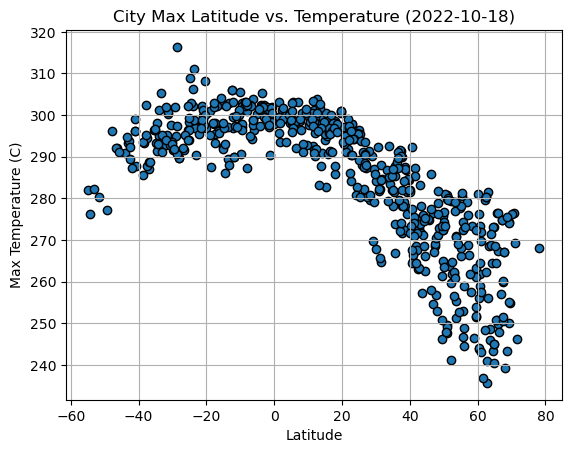

In [91]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

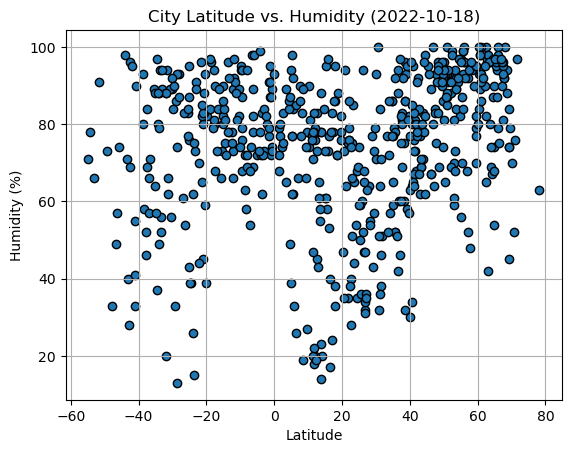

In [92]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

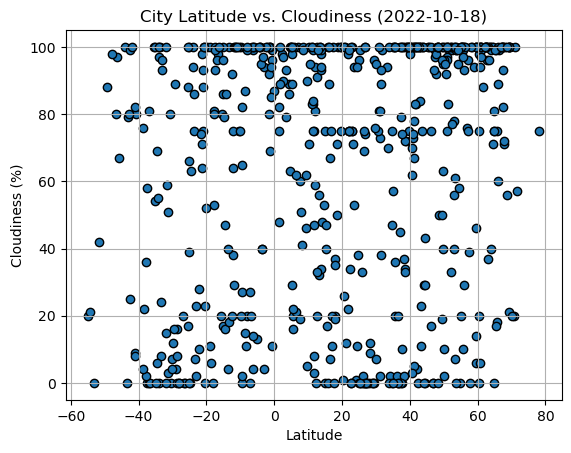

In [93]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

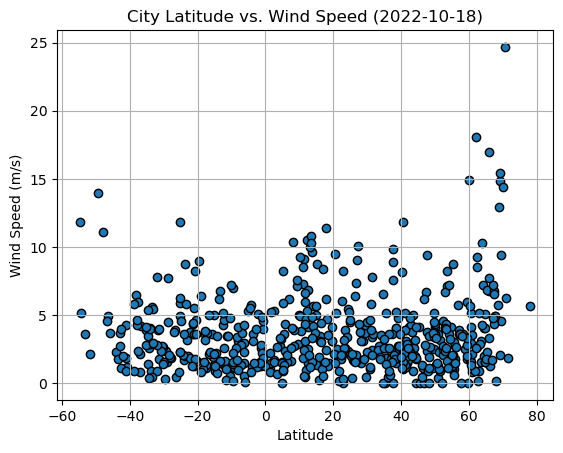

In [94]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
cities = ['New York', 'London', 'Paris', 'Berlin', 'Moscow', 'Tokyo', 'Seoul', 'Beijing']

# Define a list to store the data for each city
data = []

# Loop through each city and make an API request
for city in cities:
    params = {'q': city, 'appid': weather_api_key, 'units': 'metric'}
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Check for errors in the response
        city_data = response.json()
        if 'cod' in city_data and city_data['cod'] == 200:
            numeric_data = {
                'City': city,
                'Temperature (Celsius)': city_data['main']['temp'],
                'Max Temperature (Celsius)': city_data['main']['temp_max'],
                'Humidity (%)': city_data['main']['humidity'],
                'Cloudiness (%)': city_data['clouds']['all'],
                'Wind Speed (m/s)': city_data['wind']['speed'],
                'Latitude': city_data['coord']['lat'],
                'Longitude': city_data['coord']['lon'],
                'Date': pd.to_datetime(city_data['dt'], unit='s'),
            }
            data.append(numeric_data)
        else:
            print(f"Error fetching data for {city}: {city_data.get('message', 'Unknown error')}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {city}: {e}")

northern_hemi_df = pd.DataFrame(data)
northern_hemi_df.head()

,City,Temperature (Celsius),Max Temperature (Celsius),Humidity (%),Cloudiness (%),Wind Speed (m/s),Latitude,Longitude,Date
0,New York,1.66,2.60,81,100,5.14,40.7143,-74.0060,2024-01-31 03:04:29
1,London,6.88,7.52,76,19,1.34,51.5085,-0.1257,2024-01-31 03:09:40
2,Paris,6.34,7.88,80,100,2.06,48.8534,2.3488,2024-01-31 03:03:30
3,Berlin,8.07,8.88,81,100,7.15,52.5244,13.4105,2024-01-31 03:05:32
4,Moscow,-0.79,-0.71,100,99,1.29,55.7522,37.6156,2024-01-31 03:03:20


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
cities = ['Sydney', 'Santiago', 'Cape Town', 'Buenos Aires', 'Rio de Janeiro', 'Auckland', 'Perth', 'Johannesburg']

# Define a list to store the data for each city
data = []

for city in cities:
    params = {'q': city, 'appid': weather_api_key, 'units': 'metric'}
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Check for errors in the response
        city_data = response.json()
        if 'cod' in city_data and city_data['cod'] == 200:
            numeric_data = {
                'City': city,
                'Temperature (Celsius)': city_data['main']['temp'],
                'Max Temperature (Celsius)': city_data['main']['temp_max'],
                'Humidity (%)': city_data['main']['humidity'],
                'Cloudiness (%)': city_data['clouds']['all'],
                'Wind Speed (m/s)': city_data['wind']['speed'],
                'Latitude': city_data['coord']['lat'],
                'Longitude': city_data['coord']['lon'],
                'Date': pd.to_datetime(city_data['dt'], unit='s'),
            }
            data.append(numeric_data)
        else:
            print(f"Error fetching data for {city}: {city_data.get('message', 'Unknown error')}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {city}: {e}")

southern_hemi_df = pd.DataFrame(data)
southern_hemi_df.head()

,City,Temperature (Celsius),Max Temperature (Celsius),Humidity (%),Cloudiness (%),Wind Speed (m/s),Latitude,Longitude,Date
0,Sydney,25.05,27.49,80,75,8.23,-33.8679,151.2073,2024-01-31 03:05:23
1,Santiago,25.28,27.41,39,0,4.12,-33.4569,-70.6483,2024-01-31 03:11:26
2,Cape Town,18.61,21.18,82,0,1.03,-33.9258,18.4232,2024-01-31 03:12:05
3,Buenos Aires,28.20,28.86,69,0,2.06,-34.6132,-58.3772,2024-01-31 03:07:48
4,Rio de Janeiro,26.98,26.98,89,75,3.60,-22.9028,-43.2075,2024-01-31 03:08:02


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.178409901494842


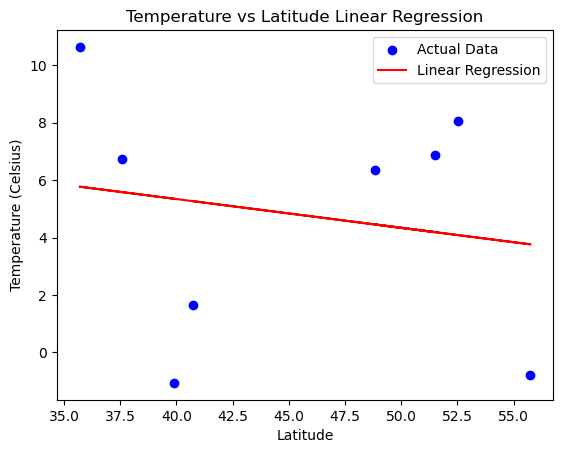

In [98]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Latitude'], northern_hemi_df['Temperature (Celsius)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * northern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(northern_hemi_df['Latitude'], northern_hemi_df['Temperature (Celsius)'], color='blue', label='Actual Data')
plt.plot(northern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

The r-value is -0.2265455825877787


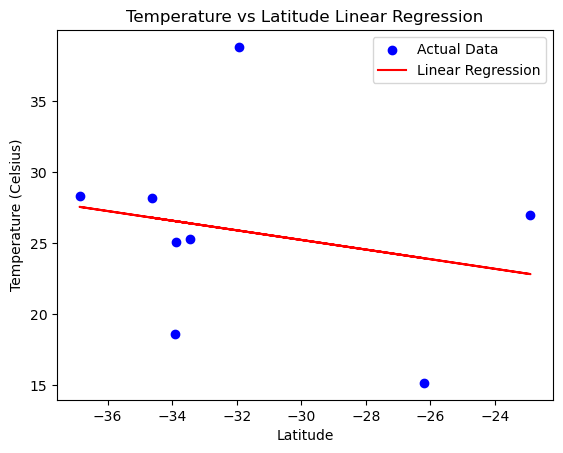

In [99]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Latitude'], southern_hemi_df['Temperature (Celsius)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * southern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(southern_hemi_df['Latitude'], southern_hemi_df['Temperature (Celsius)'], color='blue', label='Actual Data')
plt.plot(southern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:** 
Based on my observation, it appears that the linear regression analyses conducted on the charts above indicate a consistent trend. Specifically, the analysis suggests that as latitude increases, there is a corresponding decrease in temperature. In both cases, the regression lines demonstrate a negative slope, highlighting the inverse relationship between latitude and temperature. This implies that as one moves towards higher latitudes, the temperature tends to decrease.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.8139012546007731

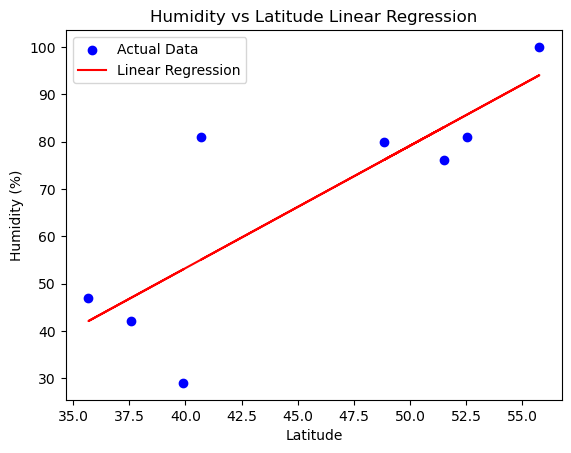

In [100]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Latitude'], northern_hemi_df['Humidity (%)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * northern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(northern_hemi_df['Latitude'], northern_hemi_df['Humidity (%)'], color='blue', label='Actual Data')
plt.plot(northern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

The r-value is 0.42476080157942947


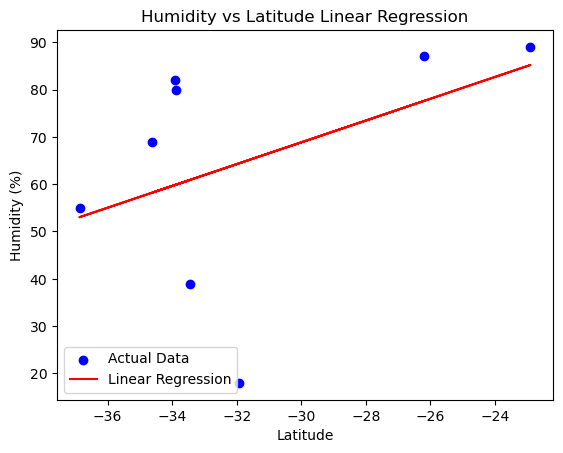

In [101]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Latitude'], southern_hemi_df['Humidity (%)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * southern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(southern_hemi_df['Latitude'], southern_hemi_df['Humidity (%)'], color='blue', label='Actual Data')
plt.plot(southern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:** 
Based on my analysis of the provided charts, it appears that both graphs exhibit a positive correlation between humidity and latitude. Specifically, as latitude increases, humidity tends to rise. Nevertheless, it is noteworthy that the linear regression line for the northern hemisphere demonstrates a more rapid ascent compared to its counterpart in the southern hemisphere. In other words, the increase in humidity appears to be more pronounced in the northern hemisphere as latitude values increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.4136524284815898


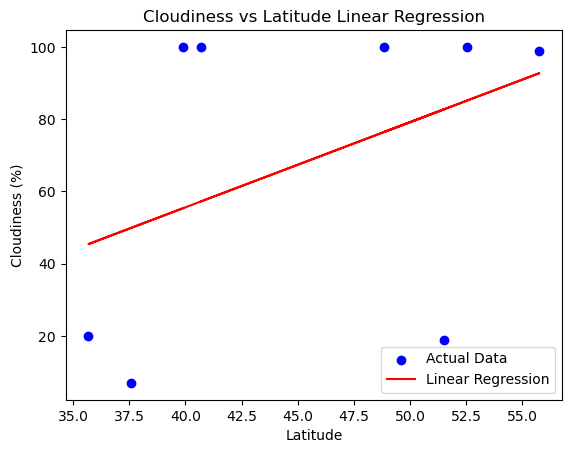

In [102]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Latitude'], northern_hemi_df['Cloudiness (%)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * northern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(northern_hemi_df['Latitude'], northern_hemi_df['Cloudiness (%)'], color='blue', label='Actual Data')
plt.plot(northern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

The r-value is 0.34860845808837876


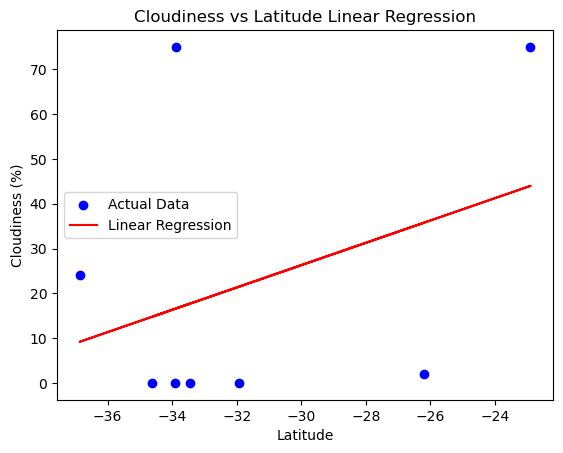

In [103]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Latitude'], southern_hemi_df['Cloudiness (%)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * southern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(southern_hemi_df['Latitude'], southern_hemi_df['Cloudiness (%)'], color='blue', label='Actual Data')
plt.plot(southern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:** 
Based on my observations, it appears that the linear regressions depicted in the charts above indicate a positive correlation between cloudiness and latitude. In other words, as the latitude increases, there is a tendency for cloudiness to also increase. Upon closer examination, I noticed that the distribution of cities is scattered across all charts. Nevertheless, it's noteworthy that the northern hemisphere tends to exhibit a higher starting point in cloudiness percentage, implying that, on average, cities in the northern hemisphere experience relatively higher cloudiness compared to their southern hemisphere counterparts.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.055068810396976885


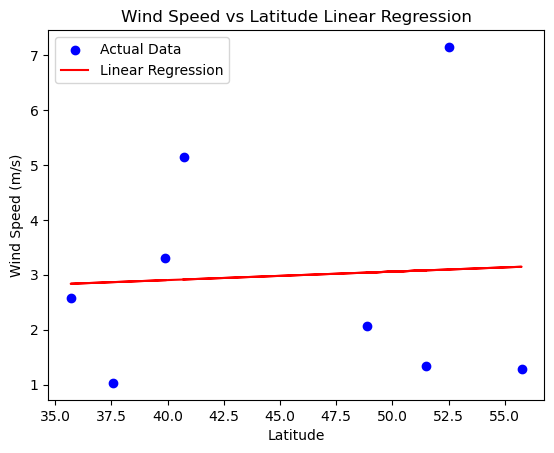

In [104]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Latitude'], northern_hemi_df['Wind Speed (m/s)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * northern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(northern_hemi_df['Latitude'], northern_hemi_df['Wind Speed (m/s)'], color='blue', label='Actual Data')
plt.plot(northern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

The r-value is -0.29494357511673513


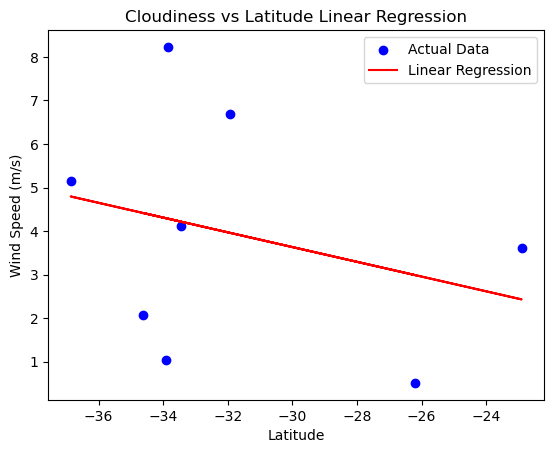

In [105]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Latitude'], southern_hemi_df['Wind Speed (m/s)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * southern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(southern_hemi_df['Latitude'], southern_hemi_df['Wind Speed (m/s)'], color='blue', label='Actual Data')
plt.plot(southern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Cloudiness vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:**  
Based on my observations, it appears that in the northern hemisphere, the linear regression demonstrates a gradual and marginal upward trend with increasing latitude. In contrast, the southern hemisphere exhibits a more pronounced and swift decline in comparison to the northern hemisphere, as latitude increases.